# Explanatory Data Analysis (Olympic Games)

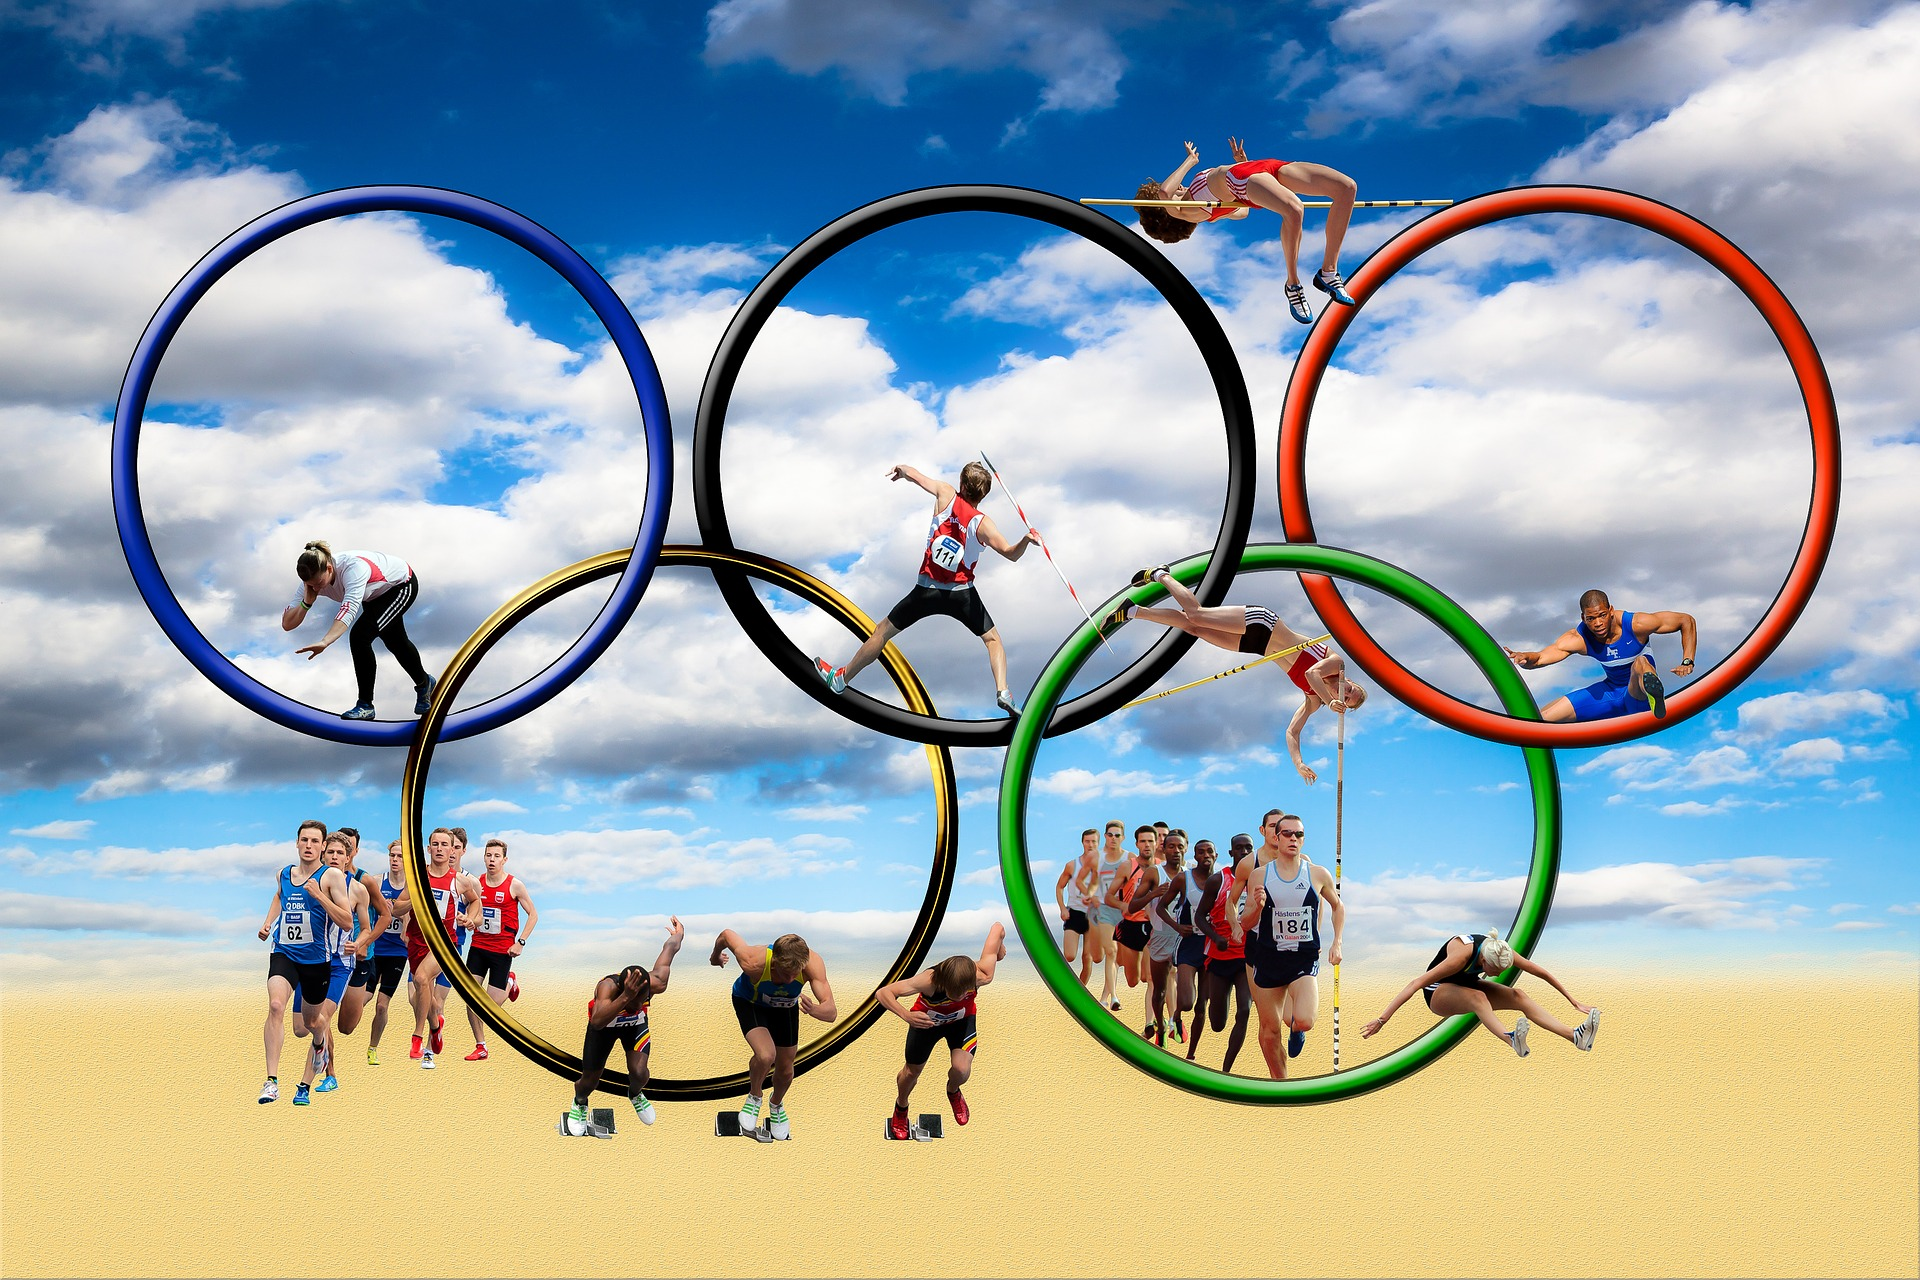

## Data Import and Inspection | Merging and Concatenating | Preparation

In [2]:
import pandas as pd
import numpy as np

In [3]:
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')
dic= pd.read_csv('dictionary.csv')

In [4]:
winter['Edition'] = 'Winter'
winter.head()

Year      City     Sport Discipline               Athlete Country Gender  \
0  1924  Chamonix  Biathlon   Biathlon           BERTHET, G.     FRA    Men   
1  1924  Chamonix  Biathlon   Biathlon        MANDRILLON, C.     FRA    Men   
2  1924  Chamonix  Biathlon   Biathlon   MANDRILLON, Maurice     FRA    Men   
3  1924  Chamonix  Biathlon   Biathlon       VANDELLE, André     FRA    Men   
4  1924  Chamonix  Biathlon   Biathlon  AUFDENBLATTEN, Adolf     SUI    Men   

             Event   Medal Edition  
0  Military Patrol  Bronze  Winter  
1  Military Patrol  Bronze  Winter  
2  Military Patrol  Bronze  Winter  
3  Military Patrol  Bronze  Winter  
4  Military Patrol    Gold  Winter

In [5]:
summer['Edition'] = 'Summer'
summer.head()

Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal Edition  
0              100M Freestyle    Gold  Summer  
1              100M Freestyle  Silver  Summer  
2  100M Freestyle For Sailors  Bronze  Summer  
3  100M Freestyle For Sailors    Gold  Summer  
4  100M Freestyle For Sailors  Silver  Summer

In [6]:
olympics = pd.concat((summer,winter))
olympics

Year    City     Sport Discipline             Athlete Country Gender  \
0     1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1     1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2     1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3     1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4     1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   
...    ...     ...       ...        ...                 ...     ...    ...   
5765  2014   Sochi    Skiing  Snowboard        JONES, Jenny     GBR  Women   
5766  2014   Sochi    Skiing  Snowboard     ANDERSON, Jamie     USA  Women   
5767  2014   Sochi    Skiing  Snowboard  MALTAIS, Dominique     CAN  Women   
5768  2014   Sochi    Skiing  Snowboard        SAMKOVA, Eva     CZE  Women   
5769  2014   Sochi    Skiing  Snowboard    TRESPEUCH, Chloe     FRA  Women   

                           Event   Medal Edition  
0                 100M Freestyle    Gold  Summer  
1                 100M Freestyle  Silver  Summer  
2     100M Freestyle For Sailors  Bronze  Summer  
3     100M Freestyle For Sailors    Gold  Summer  
4     100M Freestyle For Sailors  Silver  Summer  
...                          ...     ...     ...  
5765                  Slopestyle  Bronze  Winter  
5766                  Slopestyle    Gold  Winter  
5767             Snowboard Cross  Silver  Winter  
5768             Snowboard Cross    Gold  Winter  
5769             Snowboard Cross  Bronze  Winter  

[36935 rows x 10 columns]

## Data Cleaning

In [7]:
olympics.loc[olympics.Country.isnull()]

Year    City          Sport           Discipline          Athlete  \
29603  2012  London      Athletics            Athletics          Pending   
31072  2012  London  Weightlifting        Weightlifting          Pending   
31091  2012  London  Weightlifting        Weightlifting          Pending   
31110  2012  London      Wrestling  Wrestling Freestyle  KUDUKHOV, Besik   

      Country Gender     Event   Medal Edition  
29603     NaN  Women     1500M    Gold  Summer  
31072     NaN  Women      63KG    Gold  Summer  
31091     NaN    Men      94KG  Silver  Summer  
31110     NaN    Men  Wf 60 KG  Silver  Summer

In [8]:
olympics.loc[(olympics.Country.isnull())&(olympics.Sport=='Wrestling'),'Country']='RUS'
#found these are attributed to Russia

In [9]:
olympics.drop(index=olympics.loc[olympics.Country.isnull()].index,inplace=True)
#Likely cases of doping. This removes the final missing values from our dataset

In [10]:
dic

Country Code  Population  GDP per Capita
0        Afghanistan  AFG  32526562.0      594.323081
1            Albania  ALB   2889167.0     3945.217582
2            Algeria  ALG  39666519.0     4206.031232
3    American Samoa*  ASA     55538.0             NaN
4            Andorra  AND     70473.0             NaN
..               ...  ...         ...             ...
196          Vietnam  VIE  91703800.0     2111.138024
197  Virgin Islands*  ISV    103574.0             NaN
198            Yemen  YEM  26832215.0     1406.291651
199           Zambia  ZAM  16211767.0     1304.879014
200         Zimbabwe  ZIM  15602751.0      924.143819

[201 rows x 4 columns]

In [11]:
#less memory/using for sorting
olympics.Medal = olympics.Medal.astype("category")

In [12]:
new = pd.merge(left = olympics,right=dic,left_on='Country',right_on='Code',how='left')
new.drop(columns=['Code','Population','GDP per Capita'],inplace=True)

In [13]:
new.rename(columns={'Country_x':'Code','Country_y':'Country'},inplace=True)

In [14]:
#dropping codes that don't belong to a country
new.drop(index=new.loc[new.Code=='ZZX'].index,inplace=True)

In [15]:
torep=pd.DataFrame.from_dict(data={'URS':'SovietUnion','GDR':'EastGermany','ROU':'Romania','FRG':'WestGermany','TCH':'Czechoslovakia','YUG':'Yugoslavia','EUN':'UnifiedTeam','EUA':'UnifiedTeamofGermany','ZZX':'Mixedteams','SRB':'Serbia','ANZ':'Australasia','RU1':'RussianEmpire','MNE':'Montenegro','TTO':'TrinidadandTobago','BOH':'Bohemia','BWI':'WestIndiesFederation','SGP':'Singapore','IOP':'IndependentOlympicParticipants'},orient='index').reset_index()
torep.rename(columns={'index':'code',0:'country'},inplace=True)
torep

code                         country
0   URS                     SovietUnion
1   GDR                     EastGermany
2   ROU                         Romania
3   FRG                     WestGermany
4   TCH                  Czechoslovakia
5   YUG                      Yugoslavia
6   EUN                     UnifiedTeam
7   EUA            UnifiedTeamofGermany
8   ZZX                      Mixedteams
9   SRB                          Serbia
10  ANZ                     Australasia
11  RU1                   RussianEmpire
12  MNE                      Montenegro
13  TTO               TrinidadandTobago
14  BOH                         Bohemia
15  BWI            WestIndiesFederation
16  SGP                       Singapore
17  IOP  IndependentOlympicParticipants

In [16]:
dicr={'URS':'SovietUnion','GDR':'EastGermany','ROU':'Romania','FRG':'WestGermany','TCH':'Czechoslovakia','YUG':'Yugoslavia','EUN':'UnifiedTeam','EUA':'UnifiedTeamofGermany','ZZX':'Mixedteams','SRB':'Serbia','ANZ':'Australasia','RU1':'RussianEmpire','MNE':'Montenegro','TTO':'TrinidadandTobago','BOH':'Bohemia','BWI':'WestIndiesFederation','SGP':'Singapore','IOP':'IndependentOlympicParticipants'}

In [17]:
new.loc[new.Code.isin(torep.code),'Country']=new['Code'].map(dicr)

In [18]:
new.Country.replace(to_replace='SovietUnion',value='Russia',inplace=True)

## What are the most successful countries of all time?

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,12)})
sns.set_style('white')

In [46]:
new.Medal.cat.set_categories(["Bronze","Silver","Gold"],ordered=True)
new.sort_values('Medal',ascending=False)
#Sorting values

Year                   City      Sport     Discipline  \
6931   1936                 Berlin   Handball       Handball   
15445  1980                 Moscow  Athletics      Athletics   
28040  2008                Beijing    Cycling  Cycling Track   
8945   1956  Melbourne / Stockholm   Aquatics       Swimming   
28037  2008                Beijing    Cycling  Cycling Track   
...     ...                    ...        ...            ...   
25749  2004                 Athens   Baseball       Baseball   
25750  2004                 Athens   Baseball       Baseball   
25751  2004                 Athens   Baseball       Baseball   
25752  2004                 Athens   Baseball       Baseball   
36931  2014                  Sochi     Skiing      Snowboard   

                   Athlete Code Gender               Event   Medal Edition  \
6931        BRUNNER, Franz  AUT    Men            Handball  Silver  Summer   
15445      KNEBEL, Andreas  GDR    Men        4X400M Relay  Silver  Summer   
28040   HOUVENAGHEL, Wendy  GBR  Women  Individual Pursuit  Silver  Summer   
8945     ISHIMOTO, Takashi  JPN    Men      200M Butterfly  Silver  Summer   
28037     ROULSTON, Hayden  NZL    Men  Individual Pursuit  Silver  Summer   
...                    ...  ...    ...                 ...     ...     ...   
25749  KOBAYASHI, Masahide  JPN    Men            Baseball  Bronze  Summer   
25750       KURODA, Hiroki  JPN    Men            Baseball  Bronze  Summer   
25751   MATSUZAKA, Daisuke  JPN    Men            Baseball  Bronze  Summer   
25752       MIURA, Daisuke  JPN    Men            Baseball  Bronze  Summer   
36931     TRESPEUCH, Chloe  FRA  Women     Snowboard Cross  Bronze  Winter   

              Country                       games  
6931          Austria                 1936 Berlin  
15445     EastGermany                 1980 Moscow  
28040  United Kingdom                2008 Beijing  
8945            Japan  1956 Melbourne / Stockholm  
28037     New Zealand                2008 Beijing  
...               ...                         ...  
25749           Japan                 2004 Athens  
25750           Japan                 2004 Athens  
25751           Japan                 2004 Athens  
25752           Japan                 2004 Athens  
36931          France                  2014 Sochi  

[36884 rows x 12 columns]

### Top 10 Countries

In [49]:
top10 = new.loc[new.Country.isin(new.Country.value_counts().nlargest(10).index),:]
top10.sort_values(by="Medal",ascending=True,inplace=True)
top10.Medal=top10.Medal.astype("category")
top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20305 entries, 16854 to 22088
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Year        20305 non-null  int64   
 1   City        20305 non-null  object  
 2   Sport       20305 non-null  object  
 3   Discipline  20305 non-null  object  
 4   Athlete     20305 non-null  object  
 5   Code        20305 non-null  object  
 6   Gender      20305 non-null  object  
 7   Event       20305 non-null  object  
 8   Medal       20305 non-null  category
 9   Edition     20305 non-null  object  
 10  Country     20305 non-null  object  
 11  games       20305 non-null  object  
dtypes: category(1), int64(1), object(10)
memory usage: 1.9+ MB


C:\Users\charl.DESKTOP-E4F6RTP\AppData\Local\Temp\ipykernel_24596\3647417766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10.sort_values(by="Medal",ascending=True,inplace=True)
C:\Users\charl.DESKTOP-E4F6RTP\AppData\Local\Temp\ipykernel_24596\3647417766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10.Medal=top10.Medal.astype("category")


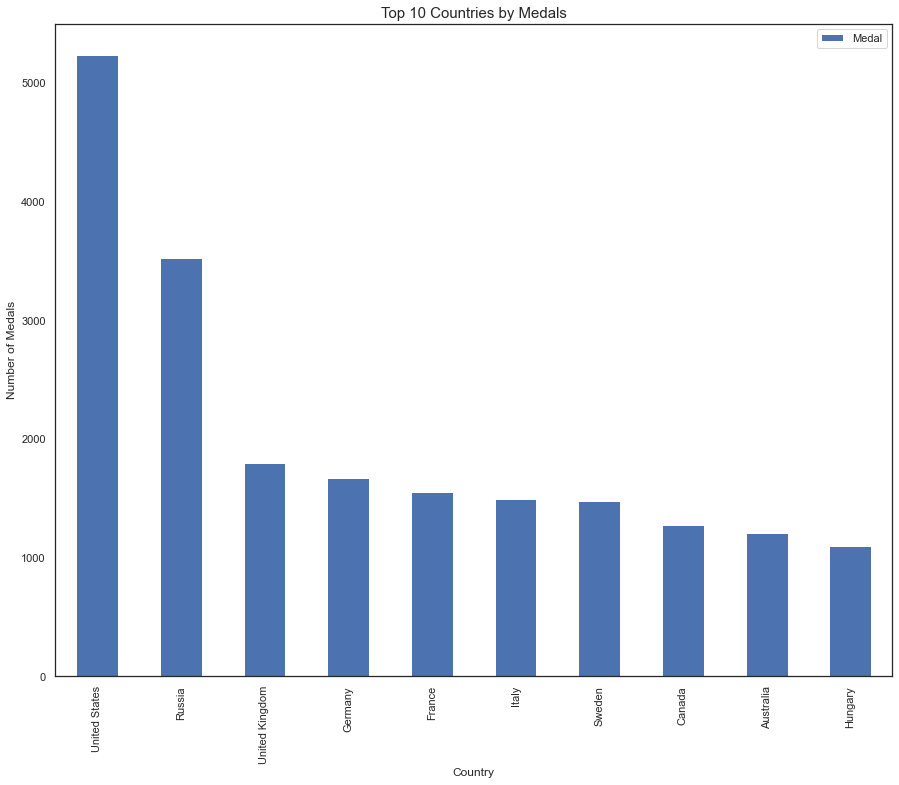

In [50]:
pd.DataFrame(new.groupby(by='Country').Medal.count()).sort_values(by='Medal',ascending=False).nlargest(10,columns='Medal').plot(kind="bar")
plt.title("Top 10 Countries by Medals",fontsize = 15)
plt.ylabel("Number of Medals")
plt.show()

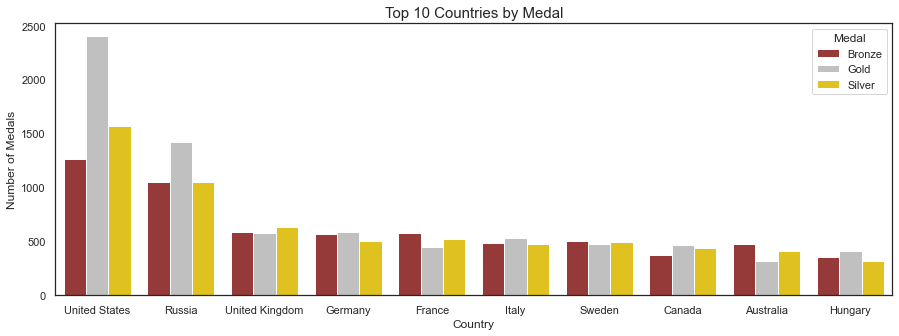

In [51]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=top10,x='Country',hue='Medal',order=top10.Country.value_counts().index,palette=['brown','silver','gold'])
plt.title("Top 10 Countries by Medal",fontsize=15)
plt.ylabel("Number of Medals")
plt.show()

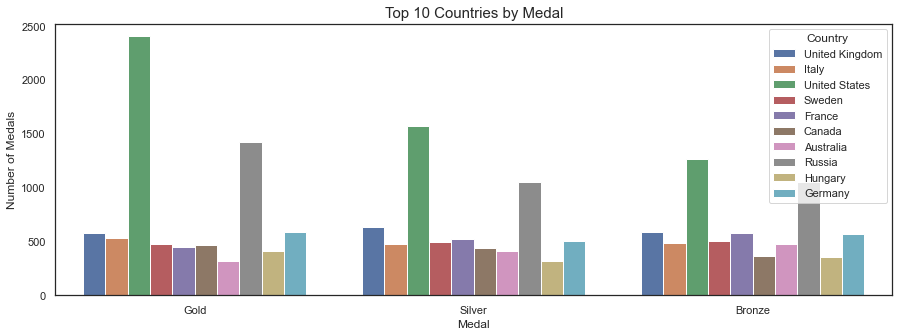

In [55]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=top10,x='Medal',hue='Country',order=top10.Medal.value_counts().index)
plt.title("Top 10 Countries by Medal",fontsize=15)
plt.ylabel("Number of Medals")
plt.show()

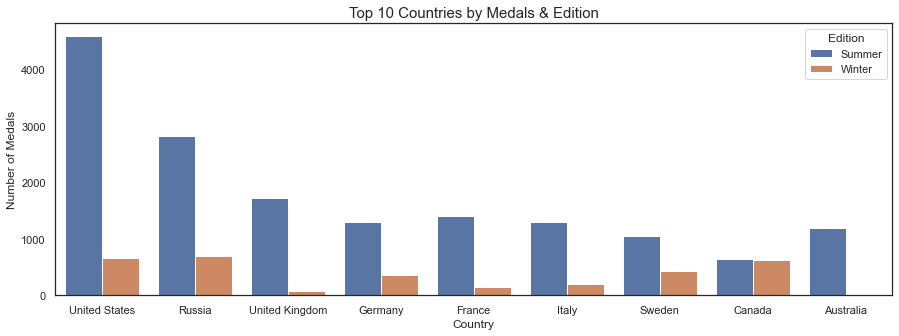

In [56]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=new,x='Country',hue='Edition',order=new.Country.value_counts().iloc[:9].index)
plt.title("Top 10 Countries by Medals & Edition",fontsize = 15)
plt.ylabel("Number of Medals")
plt.show()

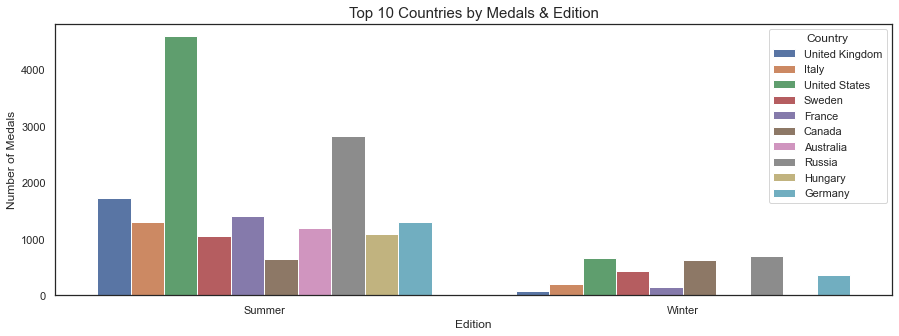

In [57]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=top10,x='Edition',hue='Country')
plt.title("Top 10 Countries by Medals & Edition",fontsize = 15)
plt.ylabel("Number of Medals")
plt.show()

## Do GDP, Population and Politics matter?

## Aggregating and Ranking

In [58]:
#two ways of counting medals (crosstab | groupby)
medals_per_country = pd.crosstab(new.Country,new.Medal,margins=True,margins_name="total",normalize=False)
medals_per_country= medals_per_country.sort_values(by='total',ascending=False).iloc[1:,:]

In [59]:
aggregated = new.groupby(by=['Country','Medal']).Medal.count().unstack()

In [60]:
aggregated['Total'] = aggregated.sum(axis=1)

In [61]:
aggregated.sort_values(by="Total",ascending=False)

Medal           Bronze  Gold  Silver  Total
Country                                    
United States     1265  2402    1571   5238
Russia            1047  1421    1053   3521
United Kingdom     587   580     632   1799
Germany            572   589     504   1665
France             578   444     526   1548
...                ...   ...     ...    ...
Tonga                0     0       1      1
Togo                 1     0       0      1
Grenada              0     1       0      1
Guyana               1     0       0      1
Niger                1     0       0      1

[144 rows x 4 columns]

In [62]:
#calculating approximate number of games per country as participation metric
new['games']= new.apply(lambda x: str(x.Year)+ " " + x.City,axis=1)

In [63]:
games = pd.DataFrame(new.groupby("Country").apply(lambda x: x.games.nunique()).sort_values(ascending=False),columns=["Total games"])

In [64]:
df = pd.merge(left=aggregated,right=dic,on='Country').sort_values(by=['Gold','Silver','Bronze'],ascending=[False,False,False])

In [65]:
df['Rank']=df.Total.rank(ascending=False)

In [66]:
df = pd.merge(left=df,right=games,on='Country')

In [67]:
top50 = df.nsmallest(50,'Rank') 

In [68]:
df.corr(method='pearson').iloc[:,[0,1,2,3,4,5,7]]

Bronze      Gold    Silver     Total  Population  \
Bronze          1.000000  0.930618  0.982158  0.979885    0.176191   
Gold            0.930618  1.000000  0.968554  0.983748    0.216831   
Silver          0.982158  0.968554  1.000000  0.995770    0.200721   
Total           0.979885  0.983748  0.995770  1.000000    0.202935   
Population      0.176191  0.216831  0.200721  0.202935    1.000000   
GDP per Capita  0.412534  0.329198  0.410454  0.383474   -0.089976   
Rank           -0.631719 -0.483969 -0.593460 -0.568062   -0.243625   
Total games     0.787653  0.621176  0.753370  0.719736    0.128863   

                GDP per Capita  Total games  
Bronze                0.412534     0.787653  
Gold                  0.329198     0.621176  
Silver                0.410454     0.753370  
Total                 0.383474     0.719736  
Population           -0.089976     0.128863  
GDP per Capita        1.000000     0.554806  
Rank                 -0.364988    -0.822373  
Total games           0.554806     1.000000

In [69]:
df.corr(method='spearman').loc['Rank',:].sort_values()
#Spearman p is typicaly used for ranks

Total            -1.000000
Total games      -0.963110
Bronze           -0.954402
Silver           -0.953239
Gold             -0.931634
GDP per Capita   -0.453150
Population       -0.424159
Rank              1.000000
Name: Rank, dtype: float64

## Statistical Analysis and Hypothesis Testing with scipy

In [70]:
top50.drop(columns=['Rank','Bronze','Silver','Gold'],inplace=True)

In [71]:
df.rename(columns={'Total':'Total Medals'},inplace=True)

In [72]:
top50.rename(columns={'Total':'Total Medals'},inplace=True)

In [73]:
top50.set_index('Country',inplace=True)

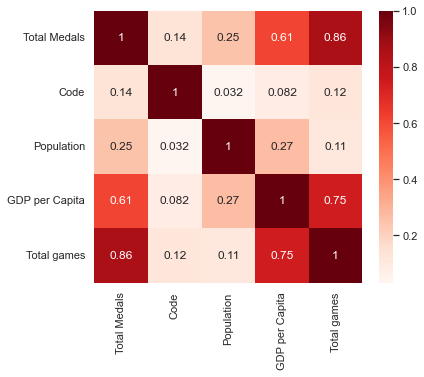

In [74]:
plt.figure(figsize=(6,5))
sns.heatmap(top50.rank(ascending=False).corr(method='spearman').abs(),annot=True,cmap='Reds')
plt.show()

### Null Hypothesis 1 = There is no relationship between total medals and population

In [75]:
import scipy.stats as stats

In [76]:
df.head()

Country  Bronze  Gold  Silver  Total Medals Code   Population  \
0   United States    1265  2402    1571          5238  USA  321418820.0   
1          Russia    1047  1421    1053          3521  RUS  144096812.0   
2         Germany     572   589     504          1665  GER   81413145.0   
3  United Kingdom     587   580     632          1799  GBR   65138232.0   
4           Italy     481   534     473          1488  ITA   60802085.0   

   GDP per Capita  Rank  Total games  
0    56115.718426   1.0           48  
1     9092.580536   2.0           29  
2    41313.313995   4.0           25  
3    43875.969614   3.0           42  
4    29957.804315   6.0           43

In [77]:
r,p_value = stats.spearmanr(df['Total Medals'],df.Population,nan_policy="omit")
print(r,p_value)

0.42415898019022863 6.057744236483611e-07


## The larger the country means a higher probability for more medals

### Reject null hypothesis -> there is a significant (positive) relationship between Total Medals and population

# hypothesis 2: there is no relationship between total medals and GDP per capita

In [78]:
r,p_value=(stats.spearmanr(df['Total Medals'],df['GDP per Capita'],nan_policy="omit"))
print(r,p_value)

0.45315012364048873 2.280256661027653e-07


### Reject Hypothesis 2 -> significant positive correlation between Total medals and GDP per capita. The richer a country, the higher probability for more medals

## hypothesis 3: there is no relationship between participation and total medal

In [79]:
r,pvalue = stats.spearmanr(df['Total Medals'],df['Total games'],nan_policy="omit")
print(r,p_value)

0.9631097111061669 2.280256661027653e-07


# reject hypothesis 3, there is a high correlation between participation and total medals

In [80]:
countryedition = pd.crosstab(new.Country,new.Edition)

In [81]:
menvswomen = pd.crosstab(new.Country,new.Gender)

In [82]:
comp = pd.merge(left=countryedition,right=menvswomen,on='Country')

In [83]:
comp['total'] = comp.sum(numeric_only=True,axis=1)

In [84]:
comp.sort_values(by='total',ascending=False,inplace=True)

In [85]:
ranks=comp.rank(method='average',ascending=False).head(50)

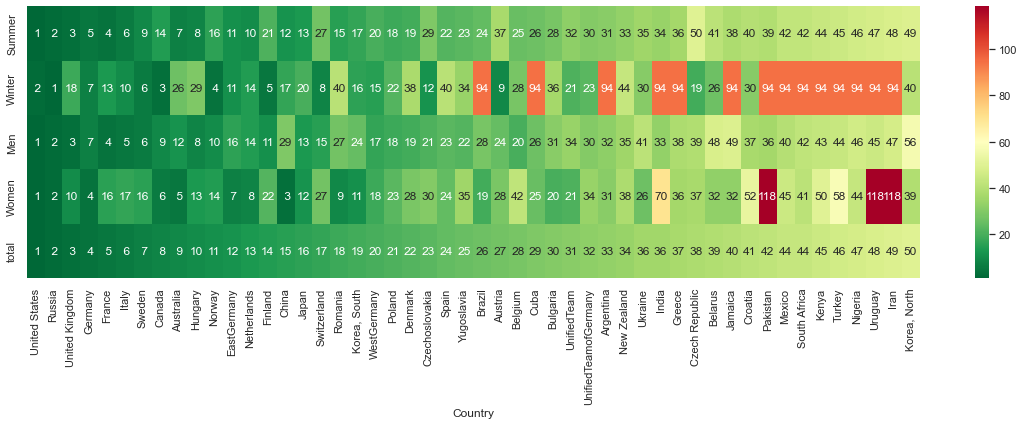

In [86]:
plt.figure(figsize=(20,5))
sns.heatmap(ranks.T,cmap="RdYlGn_r",annot=True,fmt='2.0f')
plt.show()

## Most succesful countries in the Summer

In [87]:
#most succesful teams in the summer
pd.DataFrame(comp.sort_values(by='Summer',ascending=False).head(10)['Summer'])

Summer
Country               
United States     4585
Russia            2818
United Kingdom    1720
France            1396
Germany           1305
Italy             1296
Australia         1189
Hungary           1079
Sweden            1044
Netherlands        851

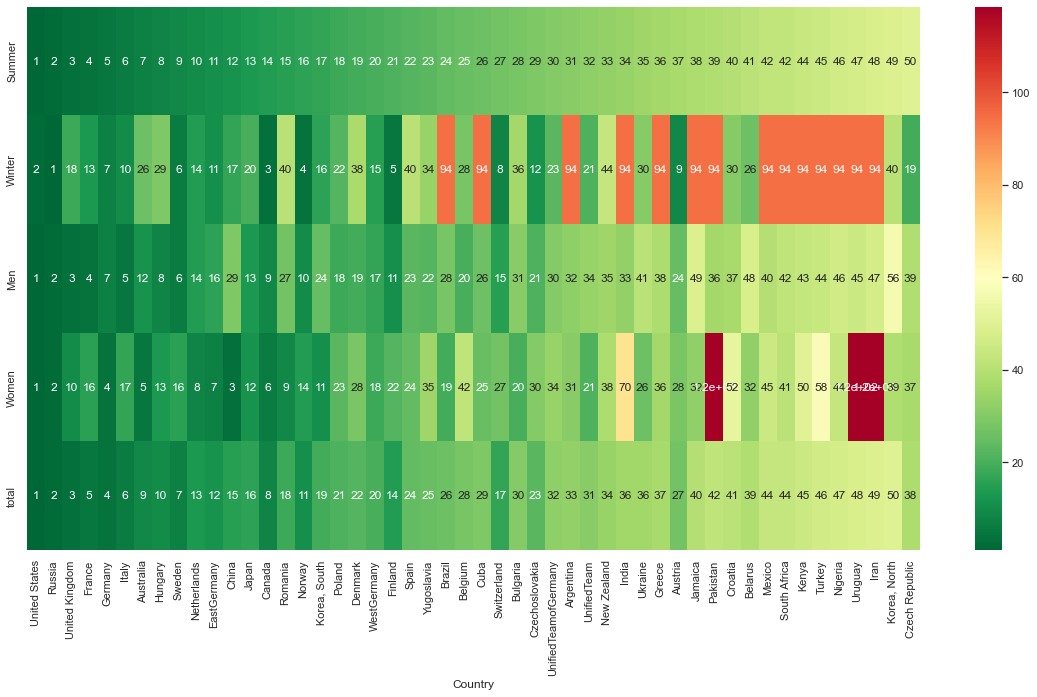

In [88]:
#most succesful in summer right to left
plt.figure(figsize=(20,10))
sns.heatmap(pd.DataFrame(ranks.sort_values(by='Summer').head(50).T),annot=True,cmap='RdYlGn_r')
plt.show()

In [89]:
df.reset_index(inplace=True)

In [90]:
best_summer=df.loc[df.Country.isin(comp.sort_values(by='Summer',ascending=False).head(10).index)].set_index('Country')

In [91]:
#using top 50 countries
best_summer=pd.merge(left=best_summer,right=pd.DataFrame(comp.sort_values(by='Summer',ascending=False).head(50)['Summer']),on='Country')

In [92]:
#correlations (spearman)
best_summer.rank(method='average',ascending=False).sort_values(by='Summer',ascending=True).corr(method='spearman').iloc[[4,6,7,8,9],[9]]

Total games
Total Medals       0.151976
Population        -0.030395
GDP per Capita     0.322190
Rank              -0.151976
Total games        1.000000

## Number of people in a country is statistically the most important factor within our dataset to olympic success. Countries with most total medals are very likely to have more summer medals.

# Most succesful countries in the winter

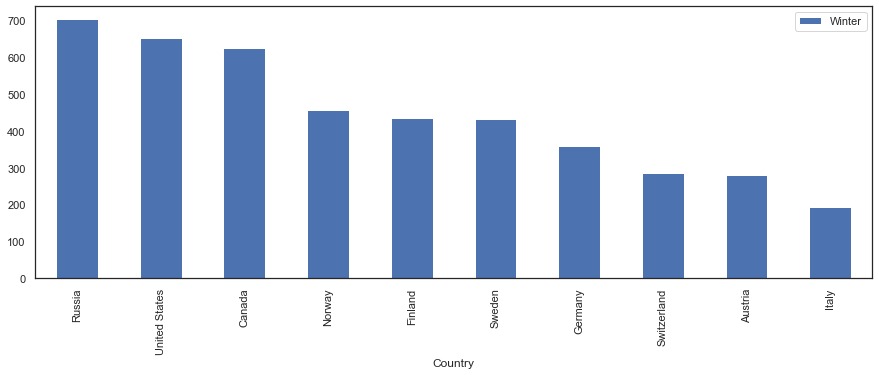

In [131]:
#most succesful teams in the winter
pd.DataFrame(comp.sort_values(by='Winter',ascending=False).head(10)['Winter']).plot(kind="bar",figsize=(15,5))
plt.show()

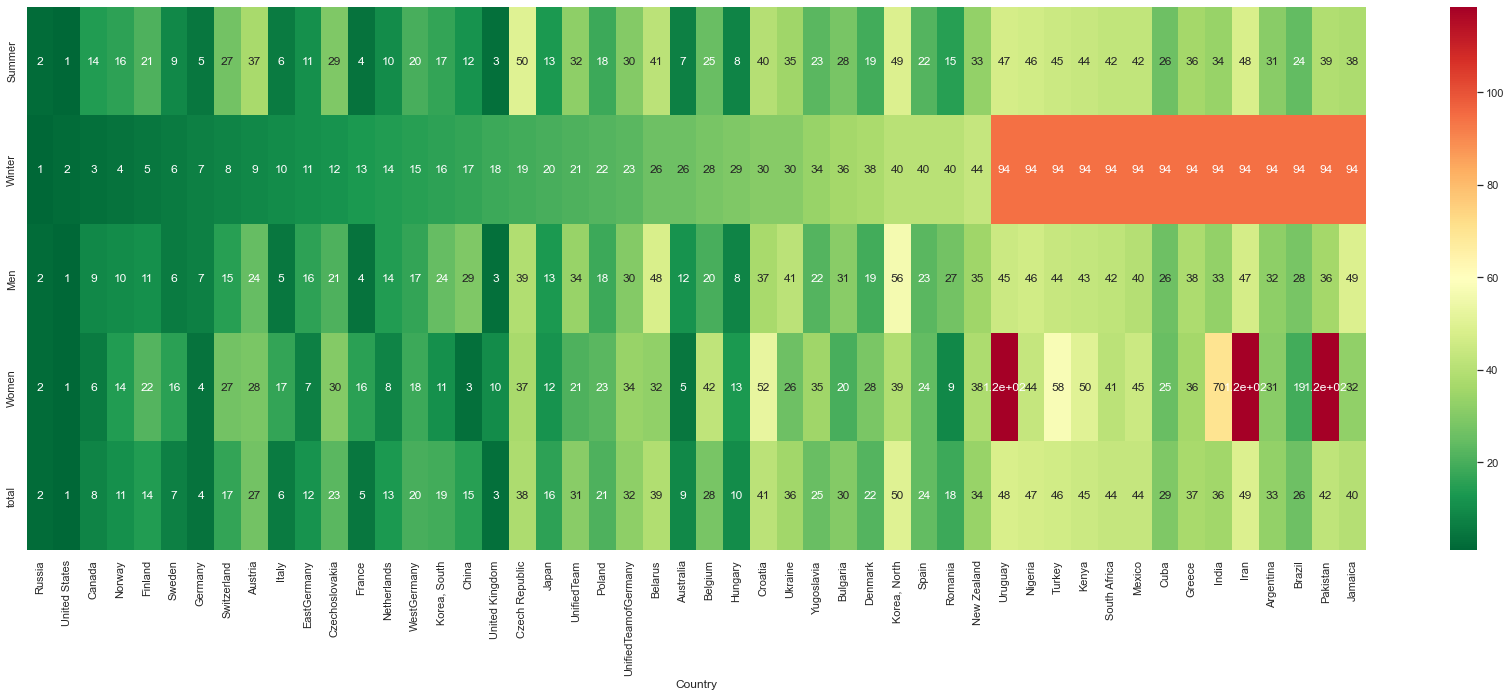

In [94]:
#most succesful winter countries left to right
plt.figure(figsize=(30,10))
sns.heatmap(pd.DataFrame(ranks.sort_values(by='Winter').head(50).T),annot=True,cmap='RdYlGn_r')
plt.show()

In [95]:
best_winter=df.loc[df.Country.isin(comp.sort_values(by='Winter',ascending=False).head(10).index)].set_index('Country')

In [96]:
#using top 50 countries
best_winter=pd.merge(left=best_winter,right=pd.DataFrame(comp.sort_values(by='Winter',ascending=False).head(50)['Winter']),on='Country')

In [97]:
best_winter.rank(method='average',ascending=False).sort_values(by='Winter',ascending=True).corr(method='spearman').loc[['Total Medals','Total games','Population','GDP per Capita'],'Winter']

Total Medals      0.490909
Total games       0.233874
Population        0.309091
GDP per Capita   -0.030303
Name: Winter, dtype: float64

## Total population is an important factor for a country's number of winter medals. Participation is more important than in the summer medals. Surprisingly, there is no significant correlation between how rich a country is and the number of winter medals within the top50 countries in this edition.

##### Identifying summer vs winter countries in the top 50

In [98]:
editionrank=pd.DataFrame(ranks.Summer-ranks.Winter)

In [99]:
editionrank.rename(columns={0:'rank'},inplace=True)

## Does geography matter?

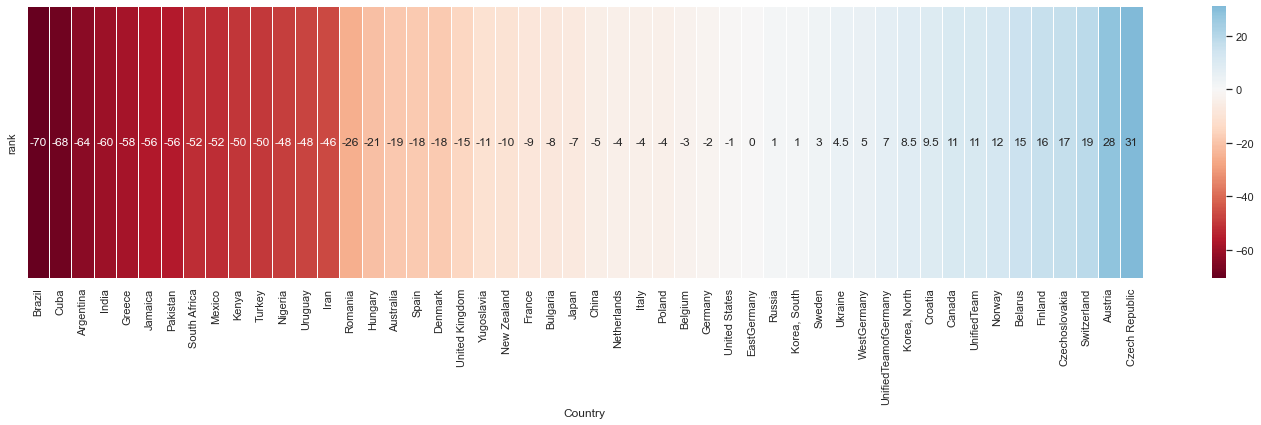

In [100]:
#here we substract the ranks to determine which are the 'summer' countries, and which are the 'winter countries'
plt.figure(figsize=(25,5))
sns.heatmap(editionrank.sort_values(by='rank').T,cmap='RdBu',annot=True,center=0,linewidths=1)
plt.show()

### Countries lacking cold weather or mountains are more likely to be summer countries and vice versa. Geographical and climatic diversity are also key components in determining a countries overall olympic success.

## Do Traditions matter?

#### Most succesful men countries

In [101]:
menvswomen.sort_values(by=['Men','Women'],ascending=[False,False])

Gender           Men  Women
Country                    
United States   3618   1620
Russia          2374   1147
United Kingdom  1470    329
France          1351    197
Italy           1292    196
...              ...    ...
Zimbabwe           0     23
Montenegro         0     14
Costa Rica         0      4
Mozambique         0      2
Bahrain            0      1

[144 rows x 2 columns]

## Most succesful women countries


In [102]:
menvswomen.sort_values(by=['Women','Men'],ascending=[False,False])

Gender                 Men  Women
Country                          
United States         3618   1620
Russia                2374   1147
China                  298    591
Germany               1119    546
Australia              704    500
...                    ...    ...
Sudan                    1      0
Togo                     1      0
Tonga                    1      0
United Arab Emirates     1      0
Virgin Islands*          1      0

[144 rows x 2 columns]

In [103]:
menvswomen['total'] = menvswomen.sum(numeric_only=True,axis=1)

## Which are the 'women countries', and 'men countries'?

In [104]:
mvwranks= menvswomen.rank(ascending=False,method='average').sort_values(by=['Women','Men'],ascending=[True,True])

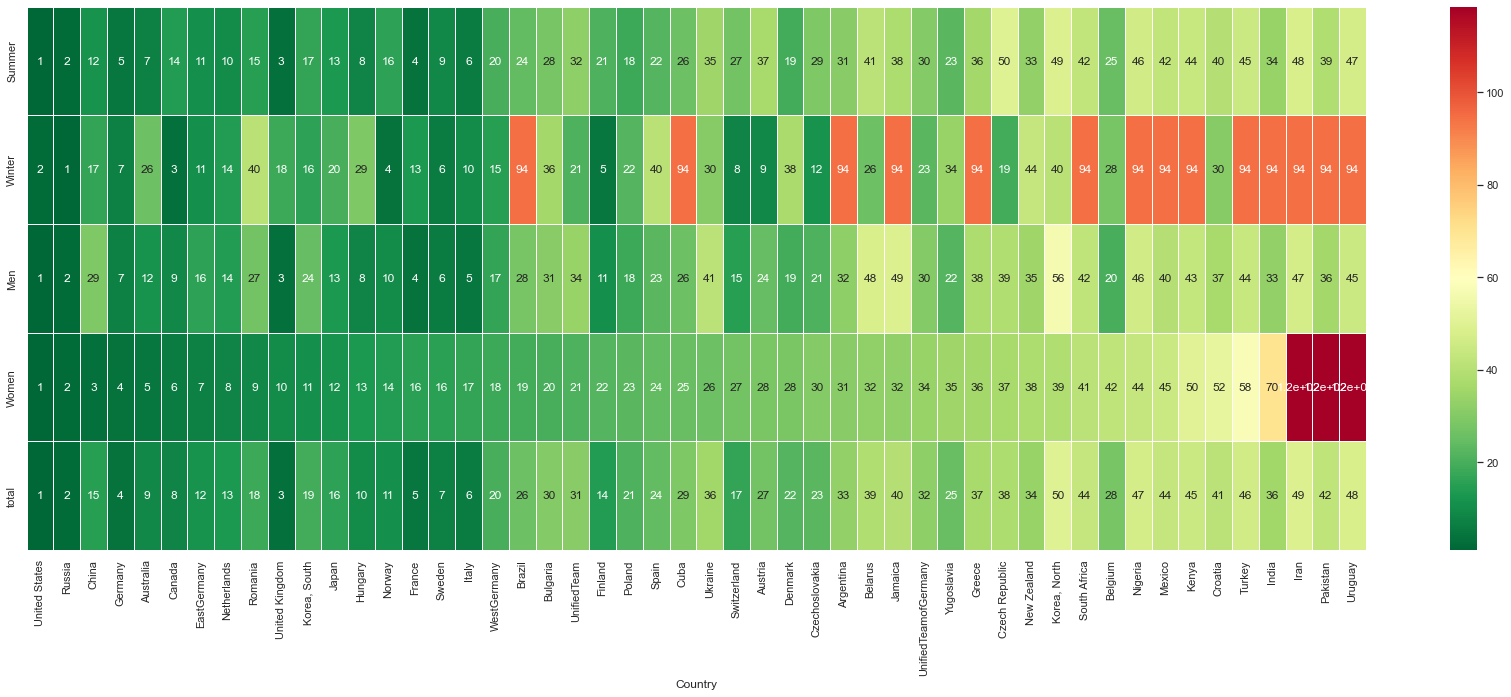

In [105]:
#most succesful countries left to right
plt.figure(figsize=(30,10))
sns.heatmap(pd.DataFrame(ranks.sort_values(by='Women').head(50).T),annot=True,cmap='RdYlGn_r',linewidths=1)
plt.show()

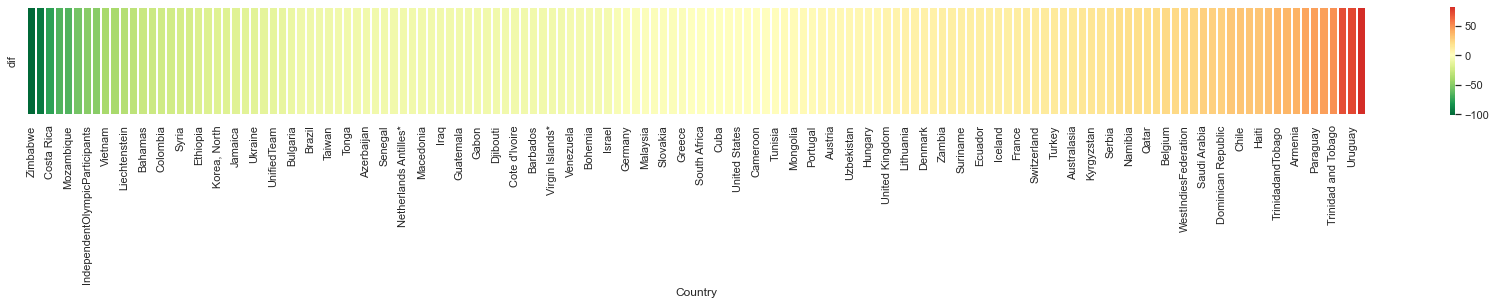

In [140]:
#female countries on left, male countries on right
plt.figure(figsize=(30,2))
sns.heatmap(data=pd.DataFrame(mvwranks.Women-mvwranks.Men,columns=['dif']).sort_values('dif').T,linewidths=2,center=0,cmap='RdYlGn_r',fmt='2.0f')
plt.show()

### Equality and effort put into both genders contribute significantly to overall olympic success

## Does culture matter?

#### Countries that are good in core sports like aquatics, athletics and rowing, or sports that have been around for a long time are likely to be more succesful

In [107]:
pd.options.display.max_rows=10
pd.DataFrame(new.Sport.value_counts())

Sport
Aquatics            4170
Athletics           3627
Rowing              2664
Gymnastics          2307
Skiing              1781
...                  ...
Croquet                8
Water Motorsports      5
Basque Pelota          4
Roque                  3
Jeu de paume           3

[48 rows x 1 columns]

In [108]:
by_sport = pd.crosstab(new.Country,new.Sport)

In [109]:
sportrank= by_sport.rank(ascending=False)

In [110]:
Sport = pd.DataFrame(new.groupby(['Country','Sport']).Sport.count()).unstack().fillna(0)

In [111]:
Sport['total']= Sport.sum(axis=1)

In [112]:
sporttop50=Sport.sort_values(by='total',ascending=False).head(50)

In [113]:
sport50rank = sporttop50.iloc[:,:-1].rank(ascending=False,method='average')

## Best countries by sport

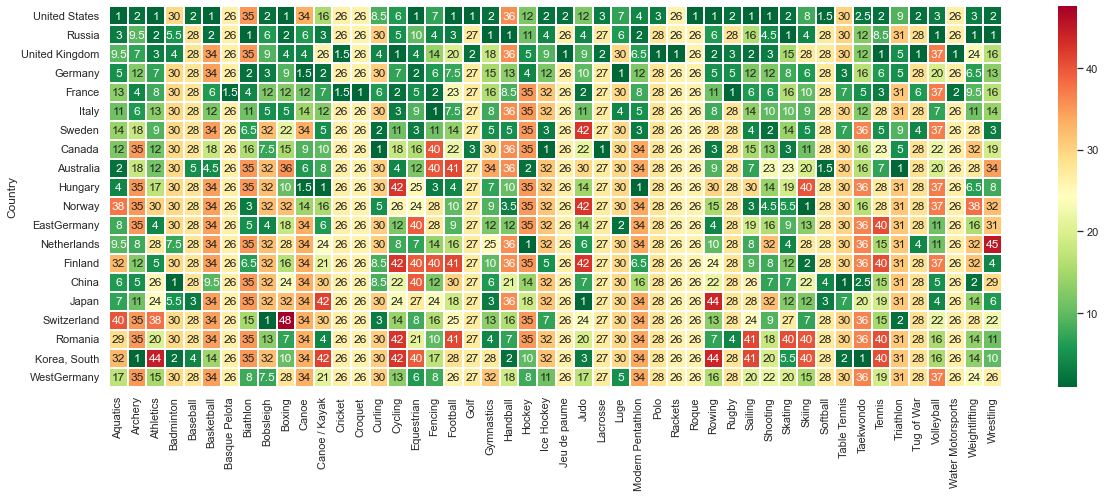

In [114]:
#top 50 countries and which sports they excel in
plt.figure(figsize=(20,7))
sns.heatmap(sport50rank.droplevel(0, axis="columns").rename_axis(columns=None).reset_index().set_index('Country').head(20),linewidths=1.5,annot=True,cmap='RdYlGn_r')
plt.show()

## Lets only consider top 6 countries per sport to see if there are any traditional factors in play

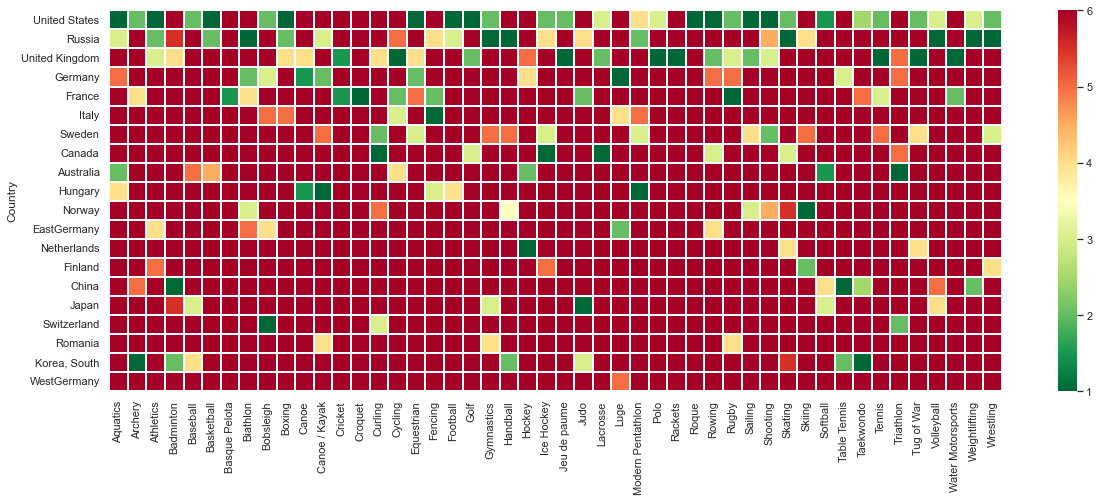

In [115]:
#top 50 countries and which sports they excel in
plt.figure(figsize=(20,7))
sns.heatmap(sport50rank.droplevel(0, axis="columns").rename_axis(columns=None).reset_index().set_index('Country').head(20),linewidths=1.5,cmap='RdYlGn_r',vmin=1,vmax=6)
plt.show()

#### The United States is the top country in the core sports, explaining part of its great success. 
#### United Kingdom for example heavily favors sports: Polo, shooting, cycling, Lacrosse, tennis, tug of war but no tradition in core sports like aquatics, gymnastics or skiing. 
#### China also does not favor core sports like aquatics. Instead favoring badminton, table tennis & taekwondo. Their traditions coud explain, in part, why they are not a top 10 country despite having a large population.

# The end

In [118]:
##dictionary used to fill null value countries
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}